<a href="https://colab.research.google.com/github/spr-att/spra-tt.github.io/blob/main/AMLProject1_montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
from scipy.stats import beta, t
import matplotlib.pyplot as plt

**Question 1:**
You're about to get on a plane to Boston. You want to know whether it is raining. You call 4 random friends of yours who live there and ask each one independently, if it's raining. The first two of your friends have a 1/2 chance of telling you the truth and, the other two have 1/4 chance of messing with you by lying. All 4 friends tell you that "No" it isn't raining. What is the probability that it's raining in Boston?

In [ ]:
weather = ['rain','no_rain']
n = 10000
total_rains = 0
lies_rain = 0
truth_norain = 0
first_friends = ['truth', 'lie']
other_friends = ['truth', 'truth', 'truth', 'lie']

In [ ]:
# is it raining?
for _i in range(n):
  w = random.choice(weather)
  if w == 'rain':
    total_rains += 1
# are my friends lying or telling the truth?
  friend_1 = random.choice(first_friends)
  friend_2 = random.choice(first_friends)
  friend_3 = random.choice(other_friends)
  friend_4 = random.choice(other_friends)
# how many times do my friends lie and it rains?
  if w == 'rain' and friend_1 == 'lie' and friend_2 == 'lie' and friend_3 == 'lie' and friend_4 == 'lie':
    lies_rain += 1
# how many times are my friends telling the truth and it doesn't rain?
  if w == 'no_rain' and friend_1 == 'truth' and friend_2 == 'truth' and friend_3 == 'truth' and friend_4 == 'truth':
    truth_norain += 1
print("The probability that it is raining in Boston when all 4 of your friends told you it wasn't is: " + str(lies_rain / total_rains))

The probability that it is raining in Boston when all 4 of your friends told you it wasn't is: 0.015552413653807311


**Question 2:**
Mad Max wants to travel from New York to Dallas by the shortest possible route. He may travel over the routes shown in the table below. Unfortunately, the Wicked Witch can block one road leading out of Atlanta and one road leading out of Nashville. Mad Max will not know which roads have been blocked until he arrives at Atlanta or Nashville. Should Mad Max start toward Atlanta or Nashville?

Route	Length of Route (miles)

*   New York - Atlanta	866
*   New York - Nashville	900
*   Nashville - St. Louis	309
*   Nashville - New Orleans	532
*   Atlanta - St. Louis	555
*   Atlanta - New Orleans	470
*   St. Louis - Dallas	662
*   New Orleans - Dallas	505

**Paths for Mad Max**
1. NY to Atlanta to St.Louis to Dallas = 2083 miles
2. NY to Atlanta to New Orleans to Dallas = 1841 miles
3. NY to Nashville to St.Louis to Dallas = 1871 miles
4. NY to Nashville to New Orleans to Dallas = 1937 miles

In [ ]:
wicked_witch = ['St.Louis', 'New Orleans']
mad_max = ['Atlanta','Nashville']
n = 10000
longest_path = 0 #path2Atlanta
shortest_path = 0 #path2Atlanta
total_atlanta = 0
short_path = 0 #path3Nashville
long_path = 0 #path4Nashville
total_nashville = 0

In [ ]:
# which way did mad max go?
for _i in range(n):
  p = random.choice(mad_max)
  if p == 'Atlanta':
    total_atlanta += 1
  if p == 'Nashville':
    total_nashville += 1
# which way did the wicked witch block?
  w = random.choice(wicked_witch)
# When Mad Max went to Atlanta...
  if p == 'Atlanta':
# how many times did we get stuck with the longest path?
    if w == 'New Orleans':
      longest_path += 1
# how many times did we get the shortest path?
    if w == 'St.Louis':
      shortest_path += 1
# When Mad Max went to Nashville...
  if p == 'Nashville':
# how many times did we get the short path?
    if w == 'New Orleans':
      short_path += 1
# how many times did we get the long path?
    if w == 'St.Louis':
      long_path += 1
print("We get stuck with the longest path " + str(longest_path / total_atlanta) + " of the time we head towards Atlanta, which makes us travel 146 miles more than if we chose to head towards Nashville.")

We get stuck with the longest path 0.49981686811174375 of the time we head towards Atlanta, which makes us travel 146 miles more than if we chose to head towards Nashville.


**Question 3:**
Simulate a population of 20000 individuals from a beta distribution that has the parametrization a=1.6 and b=2.1. Determine, via Monte Carlo simulations, what would be the smallest sample size when we draw simple random samples from this population, such that the distance between the sample mean and the population mean has at least 95% chances to be less than 0.06 units.

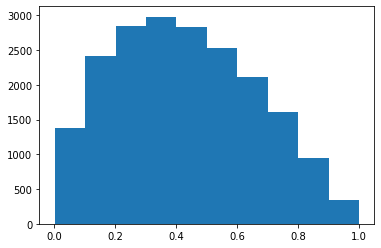

In [ ]:
x = beta.rvs(size=20000, a=1.6, b=2.1)
plt.hist(x)
plt.show()
mu=np.mean(x)
sigma=np.std(x)
k = 1000

In [ ]:
#n = list(range(100,49,-1))
smallest_sample = 100
for i in range(100,49,-1):
  samples = np.array([np.random.choice(x,size=i,replace=True,p=None) for _i in range(k)])
  means = np.mean(samples,axis=1)

  counter = 0
  for i in range(k):
    if np.abs(means[i]-mu)<0.06:
      counter += 1
  chance = counter/k

  if chance >= 0.95:
    smallest_sample -= 1

print(smallest_sample)

56
